# Data Science Blog post

Au programme :
- étude sur plusieurs années
- Quel sont les langages les plus populaire chaque année.
- Quels autres changement peuvent être observés chaque année.



charger les données depuis 2017 

on aura donc 2017'2018,2019,2020,2021,2022,2023,2024

Donc 8 années à analyser sur un format standardisé.

Ce qui permet d'analyser des tendances récentes.

- On s'intéressera à la place de l'IA et de stackOverflow dans les entreprises (2questions)
- Des langages les plus utilisé au cours du temps (1 question)
- De l'évolution des profils utilisant StackOverflow (1 à 2 questions)

On a donc 4 à 5 questions.

In [1]:
#import

import os
import zipfile
import pandas as pd

In [2]:

# Chemin vers le répertoire principal contenant les dossiers
chemin_principal = 'Stack-overflow-developper-survey'

df_list =[]

# Parcourir tous les dossiers dans le répertoire principal
for dossier in os.listdir(chemin_principal):
    # Vérifier si le nom du dossier contient une année entre 2017 et 2024
    try:
        annee = int(dossier[-4:])  # Assumer que l'année est les 4 derniers caractères
        if 2021 <= annee <= 2024:
            chemin_dossier = os.path.join(chemin_principal, dossier)
            # Assumer que 'survey_results_public.csv' est dans chaque dossier
            chemin_fichier = os.path.join(chemin_dossier, 'survey_results_public.csv')
            chemin_fichier_schema = os.path.join(chemin_dossier, 'survey_results_schema.csv')
            
            # Lire le CSV dans un DataFrame
            df = pd.read_csv(chemin_fichier)
            df_2 = pd.read_csv(chemin_fichier_schema)
            df_list.append(df)
            
            # Nom du DataFrame composé du nom du dossier et de l'année
            nom_dataframe = f'survey_results_public_{annee}'
            nom_dataframe_schema = f'survey_results_schema_{annee}'
            
            # Ajouter la colonne 'Year'
            df['Year'] = annee

            
            # Assigner le DataFrame à une variable avec le nom dynamique
            globals()[nom_dataframe] = df
            globals()[nom_dataframe_schema] = df_2
            
            print(f'DataFrame créé pour {dossier} avec le nom {nom_dataframe}')
            print(f'DataFrame créé pour {dossier} avec le nom {nom_dataframe_schema}')
    except ValueError:
        # Si le nom du dossier ne se termine pas par une année valide, on passe à l'itération suivante
        continue

print("Importation et traitement des fichiers CSV terminés.")

# Fusionner verticalement les dataframes
result = pd.concat(df_list, ignore_index=True)

DataFrame créé pour stack-overflow-developer-survey-2021 avec le nom survey_results_public_2021
DataFrame créé pour stack-overflow-developer-survey-2021 avec le nom survey_results_schema_2021
DataFrame créé pour stack-overflow-developer-survey-2022 avec le nom survey_results_public_2022
DataFrame créé pour stack-overflow-developer-survey-2022 avec le nom survey_results_schema_2022
DataFrame créé pour stack-overflow-developer-survey-2023 avec le nom survey_results_public_2023
DataFrame créé pour stack-overflow-developer-survey-2023 avec le nom survey_results_schema_2023
DataFrame créé pour stack-overflow-developer-survey-2024 avec le nom survey_results_public_2024
DataFrame créé pour stack-overflow-developer-survey-2024 avec le nom survey_results_schema_2024
Importation et traitement des fichiers CSV terminés.


In [3]:
# Fonction pour lister les noms des DataFrames dans la session actuelle
def list_dataframe_names():
    return [name for name, value in globals().items() if isinstance(value, pd.DataFrame)]

# Affichage des noms des DataFrames trouvés
dataframes_in_session = list_dataframe_names()
if dataframes_in_session:
    print("Noms des DataFrames actuellement chargés dans la session :")
    for name in dataframes_in_session:
        print(f"- {name}")
else:
    print("Aucun DataFrame n'est chargé dans la session actuelle.")

Noms des DataFrames actuellement chargés dans la session :
- df
- df_2
- survey_results_public_2021
- survey_results_schema_2021
- survey_results_public_2022
- survey_results_schema_2022
- survey_results_public_2023
- survey_results_schema_2023
- survey_results_public_2024
- survey_results_schema_2024
- result


In [4]:
# Désactiver la troncature pour les colonnes et lignes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
pd.set_option('display.max_rows', None)     # Afficher toutes les lignes
pd.set_option('display.width', None)        # Ajuster la largeur automatiquement
pd.set_option('display.max_colwidth', None)

In [5]:
#result['Language'].head(3)

In [6]:
#survey_results_schema_2024

In [7]:
#print("Unique values in Language:", survey_results_public_2024['LanguageHaveWorkedWith'].unique())

## 2. Data Understanding (Gather and Assess)

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Set visualization style
plt.style.use('seaborn')

# Display basic info about the DataFrame
print("DataFrame Info:")
result.info()

# Check unique years and sample columns to verify schema consistency
print("\nUnique Years:", result['Year'].unique())
print("\nSample of Columns:", result.columns.tolist()[:10])  # Show first 10 columns

# Check for missing values in key columns
key_columns = ['Year', 'AISelect', 'YearsCodePro', 'Employment', 'LearnCode', 'SOVisitFreq', 'YearsCode']
print("\nMissing Values in Key Columns:")
print(result[key_columns].isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311328 entries, 0 to 311327
Columns: 150 entries, ResponseId to JobSat
dtypes: float64(15), int64(2), object(133)
memory usage: 356.3+ MB

Unique Years: [2021 2022 2023 2024]

Sample of Columns: ['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode']

Missing Values in Key Columns:
Year                 0
AISelect        162448
YearsCodePro     80533
Employment        2961
LearnCode         8634
SOVisitFreq      11278
YearsCode        11052
dtype: int64


C:\Users\Marc\AppData\Local\Temp\ipykernel_6916\1925593317.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 3. Data Preparation (Clean)

We’ll clean the data by handling missing values and preparing categorical variables for analysis. Since machine learning is optional, we’ll focus on descriptive statistics but ensure data is ready for potential modeling.



In [9]:
def clean_categorical_column(df, column, fill_value='Unknown'):
    """
    Clean a categorical column by filling missing values and converting to category type.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - column (str): Column name to clean
    - fill_value (str): Value to fill missing entries
    
    Returns:
    - pd.Series: Cleaned column
    """
    return df[column].fillna(fill_value).astype('category')

def clean_numeric_column(df, column, strategy='median'):
    """
    Clean a numeric column by filling missing values with median or mean.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - column (str): Column name to clean
    - strategy (str): 'median' or 'mean' for imputation
    
    Returns:
    - pd.Series: Cleaned column
    """
    if strategy == 'median':
        fill_value = df[column].median()
    else:
        fill_value = df[column].mean()
    return df[column].fillna(fill_value)

# Define mapping for special values
years_code_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Preprocess YearsCode and YearsCodePro
for col in ['YearsCode', 'YearsCodePro']:
    result[col] = result[col].replace(years_code_mapping)
    result[col] = pd.to_numeric(result[col], errors='coerce')


# Clean key columns
result['AISelect'] = clean_categorical_column(result, 'AISelect')  # Do you use AI tools?
result['LearnCode'] = clean_categorical_column(result, 'LearnCode')  # How do you learn to code?
result['SOVisitFreq'] = clean_categorical_column(result, 'SOVisitFreq')  # Stack Overflow visit frequency
result['Employment'] = clean_categorical_column(result, 'Employment')  # Employment status
result['YearsCode'] = clean_numeric_column(result, 'YearsCode', 'median')  # Total coding years
result['YearsCodePro'] = clean_numeric_column(result, 'YearsCodePro', 'median')  # Professional coding years

# Rationale:
# - Categorical: Filled with 'Unknown' to preserve data for analysis without assuming values.
# - Numeric: Used median to impute missing years, as it’s robust to outliers in experience data.


# Notes:
# - Missing values in categorical columns are filled with 'Unknown' to avoid bias in frequency counts.
# - Numeric columns use median imputation to maintain central tendency, suitable for skewed distributions like years of experience.

## 4. Data Analysis and Visualization

### List of Questions to explore:

### Question 1: How have the most common learning methods for coding changed over time?

#### How have the most common learning methods for coding changed over time?
- timeline: 2017-2024
- Need to harmonize data before 2021
- line chart with top 5 learning method
- X = year, Y = Proportion(? need to be better defined), color line = learning method
- Insight: This highlights shifts in educational preferences, valuable for educators and training providers.

In [10]:
result_recent = result[result['Year'] >= 2021][['LearnCode', 'Year']].copy()

In [11]:
'''
# Checking data content for each year

for year in [2021,2022,2023,2024]:
    result_year = result_recent[result_recent['Year'] == year].copy()
    LearnCode_Count = result_year['LearnCode'].value_counts()
    print(year)
    print('---------------------')
    for learncode, count in LearnCode_Count.items():
        print(f"{learncode}: {count}")
'''

'\n# Checking data content for each year\n\nfor year in [2021,2022,2023,2024]:\n    result_year = result_recent[result_recent[\'Year\'] == year].copy()\n    LearnCode_Count = result_year[\'LearnCode\'].value_counts()\n    print(year)\n    print(\'---------------------\')\n    for learncode, count in LearnCode_Count.items():\n        print(f"{learncode}: {count}")\n'

C:\Users\Marc\AppData\Local\Temp\ipykernel_6916\3919017718.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_methods_per_year = method_counts.groupby('Year').apply(


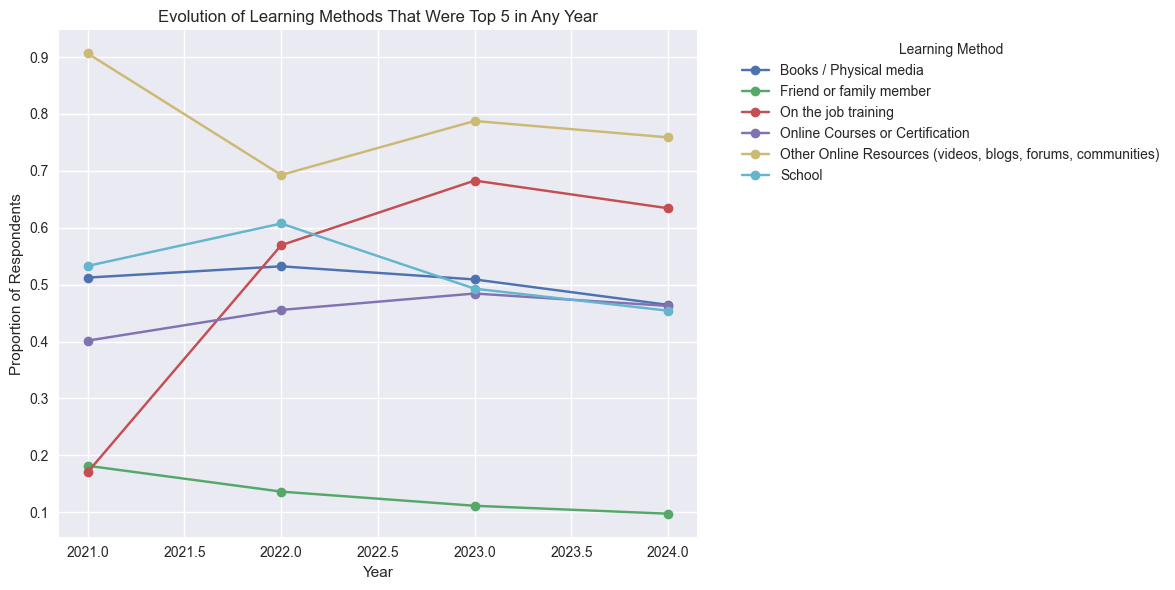

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result_recent' is a DataFrame with 'Year' and 'LearnCode' columns

# Step 1: Drop rows where 'LearnCode' is NaN
result_recent = result_recent.dropna(subset=['LearnCode'])

# Step 2: Ensure 'LearnCode' is of string type (optional, for consistency)
result_recent['LearnCode'] = result_recent['LearnCode'].astype(str)

# Step 3: Split 'LearnCode' by both commas and semicolons, strip whitespace, and remove empty entries
result_recent['LearnCode'] = result_recent['LearnCode'].str.split(';')

# Step 4: Explode the DataFrame to have one row per learning method per respondent
exploded = result_recent.explode('LearnCode')

# New Step: Harmonize similar data entries
harmonization_mapping = {
    "Other online resources (e.g., videos, blogs, forum)": "Other Online Resources (videos, blogs, forums, communities)",
    "Other online resources (ex: videos, blogs, etc., online community)": "Other Online Resources (videos, blogs, forums, communities)",
    "School (i.e., University, College, etc)" : "School",
    "Online Forum": "Other Online Resources (videos, blogs, forums, communities)",
    "Other online resources (e.g., videos, blogs, forum, online community)": "Other Online Resources (videos, blogs, forums, communities)",
    "Other online resources (ex: videos, blogs, etc)": "Other Online Resources (videos, blogs, forums, communities)",
    "Colleague": "On the job training"
}

# Apply the mapping to the 'LearnCode' column
exploded['LearnCode'] = exploded['LearnCode'].replace(harmonization_mapping)

# Step 5: Compute the total number of respondents per year
respondents_per_year = result_recent.groupby('Year').size().reset_index(name='total_respondents')

# Step 6: Count occurrences of each learning method per year
method_counts = exploded.groupby(['Year', 'LearnCode']).size().reset_index(name='count')

# Step 7: Merge with total respondents per year
method_counts = method_counts.merge(respondents_per_year, on='Year')

# Step 8: Calculate the proportion of respondents using each method
method_counts['proportion'] = method_counts['count'] / method_counts['total_respondents']

# Step 9: Identify the top 5 learning methods for each year
top_methods_per_year = method_counts.groupby('Year').apply(
    lambda x: x.nlargest(5, 'proportion')
).reset_index(drop=True)

# Step 10: Get the unique set of methods that were in the top 5 for any year
unique_top_methods = top_methods_per_year['LearnCode'].unique()

# Step 11: Filter the data to include only these unique top methods
filtered_data = method_counts[method_counts['LearnCode'].isin(unique_top_methods)]

# Step 12: Pivot the data for plotting, filling missing values with 0
pivot_data = filtered_data.pivot(index='Year', columns='LearnCode', values='proportion').fillna(0)

# Step 13: Create a line chart
pivot_data.index = pivot_data.index.astype(int)  # Convert the index to integer type
pivot_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolution of Learning Methods That Were Top 5 in Any Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Learning Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
print(exploded['LearnCode'].unique())

['Coding Bootcamp'
 'Other Online Resources (videos, blogs, forums, communities)' 'School'
 'Unknown' 'Friend or family member' 'Online Courses or Certification'
 'Other (please specify):' 'On the job training' 'Books / Physical media'
 'Hackathons (virtual or in-person)']


### Question2: How does developer compensation (CompTotal) vary by primary programming language?


#### How does developer compensation (CompTotal) vary by primary programming language through the year?
- reformulate the question properly
- line chart with Top 5 language in 2024
- timeline 2017-2024
- X = year, Y=CompTotal, color line = language

- Context: Businesses need to understand salary trends across programming languages to budget for hiring and retention, while developers can use this to negotiate salaries based on their skills.
- Approach: Analyze the CompTotal column (assumed to be annual compensation) against the Language column, focusing on the top languages.



In [14]:
'''
# Fonction pour lister les noms des DataFrames dans la session actuelle
def list_dataframe_names():
    return [name for name, value in globals().items() if isinstance(value, pd.DataFrame)]

# Affichage des noms des DataFrames trouvés
dataframes_in_session = list_dataframe_names()
if dataframes_in_session:
    print("Noms des DataFrames actuellement chargés dans la session :")
    for name in dataframes_in_session:
        print(f"- {name}")
else:
    print("Aucun DataFrame n'est chargé dans la session actuelle.")
'''

'\n# Fonction pour lister les noms des DataFrames dans la session actuelle\ndef list_dataframe_names():\n    return [name for name, value in globals().items() if isinstance(value, pd.DataFrame)]\n\n# Affichage des noms des DataFrames trouvés\ndataframes_in_session = list_dataframe_names()\nif dataframes_in_session:\n    print("Noms des DataFrames actuellement chargés dans la session :")\n    for name in dataframes_in_session:\n        print(f"- {name}")\nelse:\n    print("Aucun DataFrame n\'est chargé dans la session actuelle.")\n'

In [15]:
survey_results_schema_2024

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a developer is ""someone who writes code"".*",True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your current employment status? Select all that apply.*,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying attention to the survey questions. Select ‘Apples’ from the list and you can get back to the survey.*<br><br>,True,MC,SAVR
5,QID297,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.,False,MC,MAVR
6,QID25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *,True,MC,SAVR
7,QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR
8,QID281,LearnCodeOnline,What online resources do you use to learn to code? Select all that apply.,False,MC,MAVR
9,QID331,TechDoc,What is the source of the technical documentation you use most often to learn to code? Select all that apply.,False,MC,MAVR


In [16]:
filtered_df = survey_results_schema_2021[survey_results_schema_2021['qname'] == 'CompTotal']
print(filtered_df)
# De 2021 à 2024 On a la colonne 'CompTotal' qui nous donne les informations qui nous intéressent.
# 2017 : 'Salary'

# 2018 : 'Salary'

# 2019 : 'ConvertedComp'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks. 
#'LanguageWorkedWith' ++ 'CompTotal' 'CompFreq'

#2020  : 'ConvertedComp' 'CompTotal' 'CompFreq'
# 'LanguageWorkedWith'

# 2021 : 'Language'  ++ 'CompTotal' 'CompFreq'

# 2022 : 'Language'  ++ 'CompTotal' 'CompFreq'

# 2023 : 'Language' 'CompTotal' 

# 2024 : 'Language' 'CompTotal' 

# Need to take into account the Currency and the Country
# Some country might not have a lot of asnwers I need to see the answer by country. It will be important for the next question.

# Currency and Country and Age need to be add up.

      qid      qname  \
17  QID51  CompTotal   

                                                                                                                                                                                                                                                                                                                                                                             question  \
17  What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in ${q://QID50/ChoiceGroup/SelectedChoicesTextEntry}? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.   

    force_resp type selector  
17       False   TE       SL  


In [17]:
# Travail pour le filtrage et l'assemblage des jeux de données pour les deux premières questions:
# Les colonnes cibles sont : 'Year' , 'Language', 'LearnCode' , 'Comptotal', Salary for the year before 2019 previous year
# On ne va pas récupérer les données avant 2021 pour éviter de la confusion. On va rester sur un format plus simple à gérer.
#Ce travail ne sera pas montré alors autant ne pas chercher les complications et comparer ce qui est comparable.




In [18]:
# survey_results_public_2024.columns.tolist()
# survey_results_public_2021['LanguageHaveWorkedWith'].value_counts()

In [19]:
# survey_results_schema_2024
result.columns.tolist()

['ResponseId',
 'MainBranch',
 'Employment',
 'Country',
 'US_State',
 'UK_Country',
 'EdLevel',
 'Age1stCode',
 'LearnCode',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'Currency',
 'CompTotal',
 'CompFreq',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OpSys',
 'NEWStuck',
 'NEWSOSites',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOComm',
 'NEWOtherComms',
 'Age',
 'Gender',
 'Trans',
 'Sexuality',
 'Ethnicity',
 'Accessibility',
 'MentalHealth',
 'SurveyLength',
 'SurveyEase',
 'ConvertedCompYearly',
 'Year',
 'RemoteWork',
 'CodingActivities',
 'LearnCodeOnline',
 'LearnCodeCoursesCert',
 'PurchaseInfluence',
 'BuyNewTool',


In [20]:
result_language = result[result['Year'] >= 2024][['LanguageHaveWorkedWith', 'CompTotal','Year']].copy()

In [21]:
'''
# Checking data content for each year

for year in [2021,2022,2023,2024]:
    result_year_lang = result_language[result_language['Year'] == year].copy()
    Language_Count = result_year_lang['LanguageHaveWorkedWith'].value_counts()
    print(year)
    print('---------------------')
    for lang, count in Language_Count.items():
        print(f"{lang}: {count}")
'''

'\n# Checking data content for each year\n\nfor year in [2021,2022,2023,2024]:\n    result_year_lang = result_language[result_language[\'Year\'] == year].copy()\n    Language_Count = result_year_lang[\'LanguageHaveWorkedWith\'].value_counts()\n    print(year)\n    print(\'---------------------\')\n    for lang, count in Language_Count.items():\n        print(f"{lang}: {count}")\n'

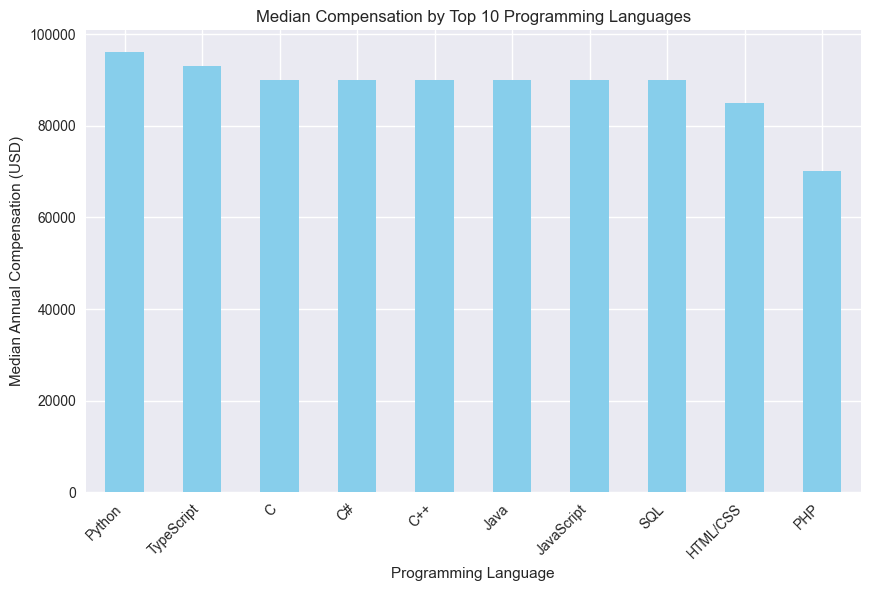


Median Compensation by Language:
LanguageHaveWorkedWith
Python        96000.0
TypeScript    93000.0
C             90000.0
C#            90000.0
C++           90000.0
Java          90000.0
JavaScript    90000.0
SQL           90000.0
HTML/CSS      85000.0
PHP           70000.0
Name: CompTotal, dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load data (assumed)
# df = pd.read_csv('stackoverflow_survey_data.csv')

# Clean compensation and language columns
result['CompTotal'] = pd.to_numeric(result['CompTotal'], errors='coerce')  # Convert to numeric, handle errors
result['LanguageHaveWorkedWith'] = clean_categorical_column(result, 'LanguageHaveWorkedWith')

# Handle multi-select languages by exploding
language_expanded = result[['CompTotal', 'LanguageHaveWorkedWith']].copy()
language_expanded['LanguageHaveWorkedWith'] = language_expanded['LanguageHaveWorkedWith'].str.split(';')
language_expanded = language_expanded.explode('LanguageHaveWorkedWith')

# Filter out invalid compensation and get top 10 languages by frequency
language_counts = language_expanded['LanguageHaveWorkedWith'].value_counts()
top_10_languages = language_counts.head(10).index
filtered_df = language_expanded[language_expanded['LanguageHaveWorkedWith'].isin(top_10_languages)].dropna(subset=['CompTotal'])

# Calculate median compensation by language
median_comp = filtered_df.groupby('LanguageHaveWorkedWith')['CompTotal'].median().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
median_comp.plot(kind='bar', color='skyblue')
plt.title('Median Compensation by Top 10 Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Median Annual Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display table
print("\nMedian Compensation by Language:")
print(median_comp)

#### AI Q1: How has the adoption of AI tools for specific tasks (AITool) changed from 2023 to 2024 across different age groups (Age)?- Context: Businesses can use age-based trends in AI tool usage to design user experiences or training that resonate with different generational preferences, such as younger developers adopting AI for innovative tasks versus older developers using it for efficiency.
- 
Approach: Compare the frequency of specific AI tool tasks (e.g., "Code generation", "Debugging") across age groups between 2023 and 2024.
- 
Visualization: Facet grid of bar charts to display the usage of each AI task across age groups, with separate panels for 2023 and 2024.- Insight: If younger developers (e.g., "18-24") increasingly use AI for "Code generation" in 2024, while older developers (e.g., "45-54") favor "Debugging", businesses could tailor AI tool features or tutorials to these age-specific preferences




- timeline: 2023-2024

In [46]:
# How to organise metric in order to be able to show

# AI QI AIselect by age group for 2024 proportion of an age group
# AI Q2 for 2024 what are the challenge. Simply displaying count for each label i na bar chart in a decreasing order.
# AI Q3 evolution of AI most common task between 2023 and 2024. Double bar chart (each year) for each label that show proportion. in decreasing order.

## Nouvelle version pour les questions IA

### Q1 AI How does the adoption of AI vary across different age groups in 2024?

In [47]:
survey_results_public_2024['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [48]:
survey_results_public_2024['AISelect'].value_counts() # Do you currently use AI tools in your development process?

AISelect
Yes                        37662
No, and I don't plan to    14837
No, but I plan to soon      8408
Name: count, dtype: int64

In [49]:
results_2024 = survey_results_public_2024.copy()

In [50]:
results_2024['Age_clean'] = results_2024['Age'].replace({
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65 +',
    'Prefer not to say': 'Prefer not to say'
})

In [51]:
import pandas as pd

# Create the crosstab with percentages
ai_adoption_by_age = pd.crosstab(results_2024['Age_clean'], 
                                 results_2024['AISelect'], 
                                 normalize='index') * 100

# Round to one decimal place for readability
ai_adoption_by_age = ai_adoption_by_age.round(1)

In [52]:
ai_adoption_by_age

AISelect,"No, and I don't plan to","No, but I plan to soon",Yes
Age_clean,,,
18-24,20.8,8.8,70.4
25-34,21.5,13.0,65.6
35-44,25.9,16.1,57.9
45-54,28.0,19.4,52.6
55-64,37.0,22.1,40.9
65 +,47.3,20.4,32.3
Prefer not to say,41.9,13.7,44.4
Under 18,29.4,9.9,60.7


In [53]:
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 +', 'Prefer not to say']
ai_select_order = ['Yes', 'No, but I plan to soon', 'No, and I don\'t plan to']

# Reindex the crosstab to enforce the desired order
ai_adoption_by_age = ai_adoption_by_age.loc[age_order, ai_select_order]

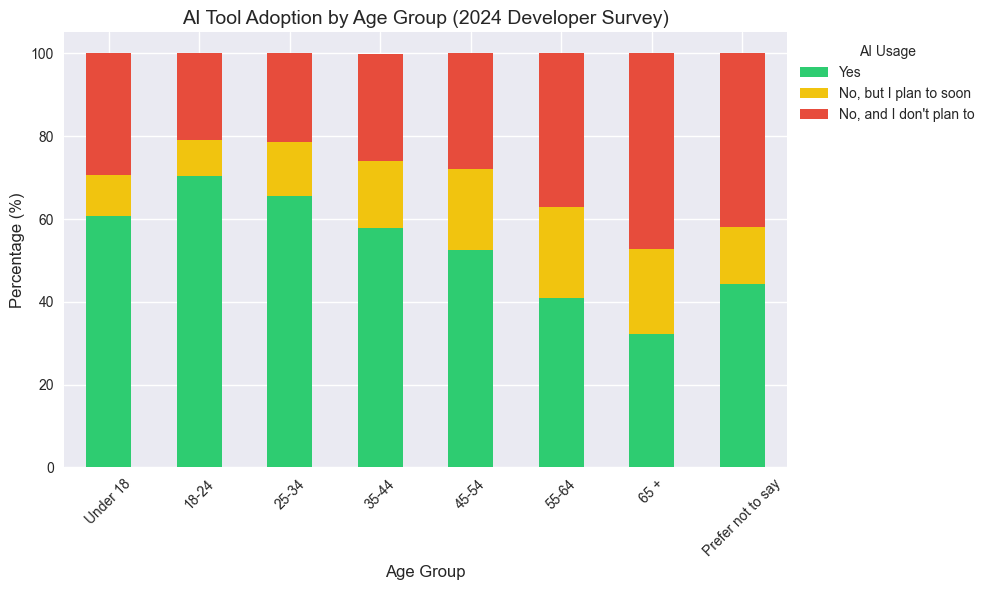

In [54]:
import matplotlib.pyplot as plt

# Plot a stacked bar chart
ai_adoption_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#f1c40f', '#e74c3c'])

# Customize the plot
plt.title('AI Tool Adoption by Age Group (2024 Developer Survey)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='AI Usage', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### Q2 AI : What are the most significant challenges for users utilizing AI code assistants or GenAI tools?


In [55]:

'''
What are the challenges to your company/whole team using AI code assistants or GenAI tools? Select all that apply.
'''
survey_results_public_2024['AIChallenges'].value_counts()

AIChallenges
Don’t trust the output or answers;AI tools lack context of codebase,  internal architecture, and/or company knowledge                                                                                                                                                                                                                                                        5502
Don’t trust the output or answers                                                                                                                                                                                                                                                                                                                                            3404
AI tools lack context of codebase,  internal architecture, and/or company knowledge                                                                                                                                                                    

In [56]:
results_challenge_2024 = survey_results_public_2024[['AIChallenges','Year']].copy()

In [57]:
# Step 1: Check and treat the data

In [58]:
results_challenge_2024['AIChallenges'] = results_challenge_2024['AIChallenges'].fillna('None').str.split(';')

In [59]:
results_challenge_2024 = results_challenge_2024.explode('AIChallenges')

In [60]:
results_challenge_2024 = results_challenge_2024[results_challenge_2024['AIChallenges'] != 'None']

In [61]:
results_challenge_2024['AIChallenges'].value_counts()

AIChallenges
Don’t trust the output or answers                                                      24450
AI tools lack context of codebase,  internal architecture, and/or company knowledge    23225
We don’t have the right policies in place to reduce security risks                     12192
Lack of proper training and education on new tools                                     11843
Not everyone uses them                                                                  9450
They create more work (more code/PRs to review, etc.)                                   5175
Lack of executive buy-in                                                                4333
Other (please specify):                                                                 2347
Name: count, dtype: int64

In [62]:
#challenge_counts = results_challenge_2024['AIChallenges'].value_counts()

C:\Users\Marc\AppData\Local\Temp\ipykernel_6916\2807940136.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(wrapped_labels)


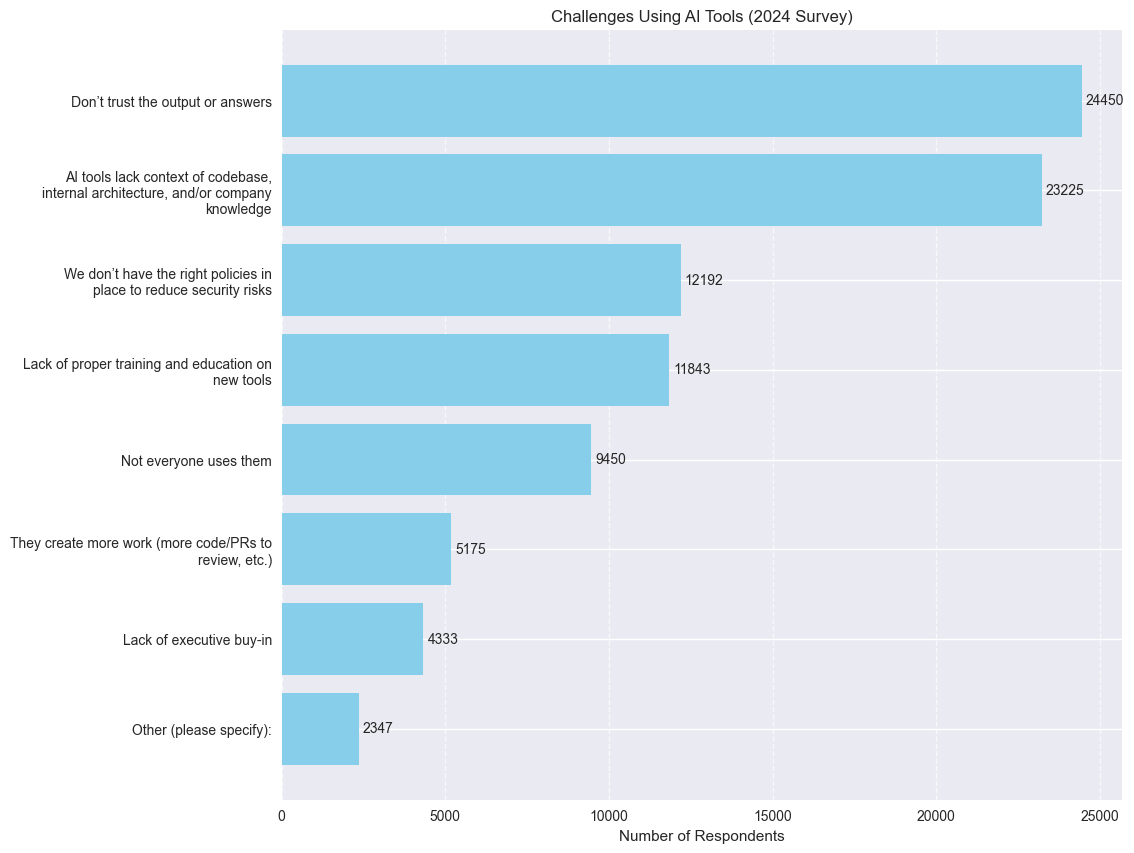

In [63]:
import textwrap

# Count the occurrences of each challenge
challenge_counts = results_challenge_2024['AIChallenges'].value_counts()

# Sort the counts in descending order
challenge_counts_sorted = challenge_counts.sort_values(ascending=False)

# Step 1: Wrap the labels to a maximum width of 40 characters
wrapped_labels = [textwrap.fill(label, width=40) for label in challenge_counts_sorted.index]

# Step 2: Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))  # Increase height for wrapped labels

# Plot horizontal bars
bars = ax.barh(challenge_counts_sorted.index, challenge_counts_sorted.values, color='skyblue')

# Add count labels on the right of each bar
ax.bar_label(bars, labels=challenge_counts_sorted.values, padding=3)

# Invert y-axis to have the largest value at the top
ax.invert_yaxis()

# Step 3: Set the wrapped y-tick labels
ax.set_yticklabels(wrapped_labels)

# Set labels and title
ax.set_xlabel('Number of Respondents')
ax.set_title('Challenges Using AI Tools (2024 Survey)')

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(left=0.3)  # Increase left margin to 30% of figure width

# Display the plot
plt.show()

In [ ]:
# Faire évoluer la représentation graphique avec des pie charts qui montrent le pourcentage de 'respondents' qui sélectionne un items.

In [64]:
'''
# Filter data for 2023 and 2024
df_ai_tasks = result[result['Year'] >= 2023][['AIToolCurrently Using', 'Age', 'Year']].copy()

# Handle missing values and split multi-response tools
df_ai_tasks['AIToolCurrently Using'] = df_ai_tasks['AIToolCurrently Using'].fillna('None').str.split(';')

# Explode the DataFrame to treat each tool separately
df_ai_tasks = df_ai_tasks.explode('AIToolCurrently Using')

# Exclude rows where no AI tool is used
df_ai_tasks = df_ai_tasks[df_ai_tasks['AIToolCurrently Using'] != 'None']

# Fill missing Age values
df_ai_tasks['Age'] = df_ai_tasks['Age'].fillna('Unknown')

# Define and order age groups
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older', 'Unknown']
df_ai_tasks['Age'] = pd.Categorical(df_ai_tasks['Age'], categories=age_order, ordered=True)

# Aggregate usage counts by year, age, and tool
task_usage = df_ai_tasks.groupby(['Year', 'Age', 'AIToolCurrently Using']).size().reset_index(name='count')
'''

"\n# Filter data for 2023 and 2024\ndf_ai_tasks = result[result['Year'] >= 2023][['AIToolCurrently Using', 'Age', 'Year']].copy()\n\n# Handle missing values and split multi-response tools\ndf_ai_tasks['AIToolCurrently Using'] = df_ai_tasks['AIToolCurrently Using'].fillna('None').str.split(';')\n\n# Explode the DataFrame to treat each tool separately\ndf_ai_tasks = df_ai_tasks.explode('AIToolCurrently Using')\n\n# Exclude rows where no AI tool is used\ndf_ai_tasks = df_ai_tasks[df_ai_tasks['AIToolCurrently Using'] != 'None']\n\n# Fill missing Age values\ndf_ai_tasks['Age'] = df_ai_tasks['Age'].fillna('Unknown')\n\n# Define and order age groups\nage_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', \n             '45-54 years old', '55-64 years old', '65 years or older', 'Unknown']\ndf_ai_tasks['Age'] = pd.Categorical(df_ai_tasks['Age'], categories=age_order, ordered=True)\n\n# Aggregate usage counts by year, age, and tool\ntask_usage = df_ai_tasks.g